In [39]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


## Part 1

In [40]:
dat = pd.read_csv("iris.csv")
dat.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
dat = dat[dat["Species"] != "setosa"]

## Part 2

In [42]:
X = dat[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = dat['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) 

In [43]:
pd.DataFrame({'test': y_test, 'predict': y_pred}).head()

,test,predict
133,virginica,versicolor
103,virginica,virginica
120,virginica,virginica
95,versicolor,versicolor
94,versicolor,versicolor


In [44]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8333333333333334


## Part 3. Search the best K

### Euclidean distance 

In [45]:
# Exhaustive search for k up to k==25
error_rate = []

for i in range(1, 25):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    classifier.fit(X_train, np.ravel(y_train))
    pred_i = classifier.predict(X_test)
    
    error_rate.append(np.mean(pred_i != np.ravel(y_test)))

Text(0, 0.5, 'Error rate')

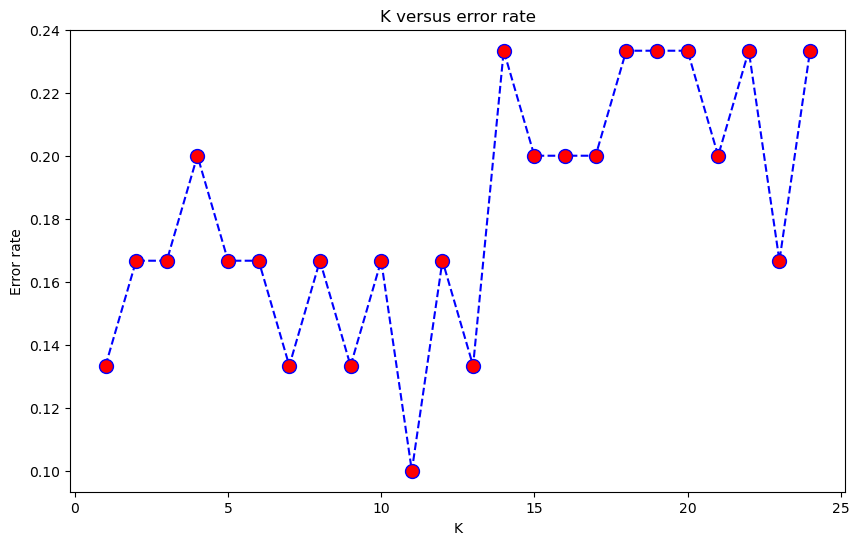

In [46]:
# Plotting the error rates for differnt k
plt.figure(figsize=(10, 6))

plt.plot(range(1, 25), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In this situation we can use k=1 as the best k, because the next k with lower Error rate is k=11, but it requires much more computational resources.

### Cosine distance

Text(0, 0.5, 'Error rate')

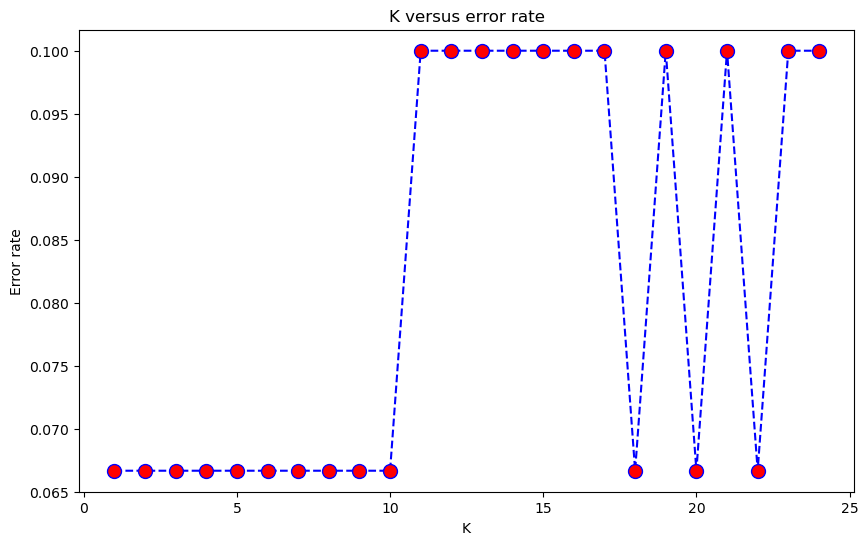

In [47]:
error_rate = []

for i in range(1, 25):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'cosine')
    classifier.fit(X_train, np.ravel(y_train))
    pred_i = classifier.predict(X_test)
    
    error_rate.append(np.mean(pred_i != np.ravel(y_test)))

plt.figure(figsize=(10, 6))

plt.plot(range(1, 25), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

With cosine distance the best choice of k is also 1, because there are no points with decrease of the error rate comparing to k=1.

## Additional search of the best k
Using GridSearchCV

In [48]:

gs = GridSearchCV(estimator = knn,
    param_grid = {'n_neighbors' : list(range(1,25))},
    scoring = 'accuracy',
    cv = 5,
    refit = True)
best_model = gs.fit(X_train, y_train).best_estimator_
print('Best k : %d' % best_model.get_params()['n_neighbors'])

Best k : 2


In this case GridSearchCV suggests k=2 as the best k for our model. It is different to our previous k, because with GridSearchCV we use *cv=5*, which sets up 5-fold cross-validation. That's why this answer should be more appropriate, since the model was trained on 4 folds and tests it on the remaining fold, repeating this process 5 times, each time with a different test fold. 

In [49]:
gs = GridSearchCV(estimator = knn,
    param_grid = {'n_neighbors' : list(range(1,25))},
    scoring = 'accuracy',
    cv = 3,
    refit = True)
best_model = gs.fit(X_train, y_train).best_estimator_
print('Best k : %d' % best_model.get_params()['n_neighbors'])

Best k : 3


Interesting that we got k=3 as the best k, if we use 3-fold cross-validation. This answer is the same as we got in R code for kNN method.

## Part 4. Strengths and weaknesses of the kNN-classifier

#### Strengths of kNN:
**Simplicity** because it requires minimal training, as it essentially stores the training data

**Non-parametric**, which makes it suitable for complex, non-linear datasets.

**Versatility**, because it can be used for both classification and regression tasks. Moreover, it can handle multi-class classification problems.

**Adaptability**: as new data is added, the model can adapt immediately.

#### Weaknesses of kNN:

**Computational Cost**: The prediction phase can be computationally expensive, especially for large datasets, as it requires calculating distances to all training points.

**Sensitivity to Feature Scaling** kNN relies on distance metrics, so it's sensitive to the scale of features. Features with larger scales can dominate the distance calculations. Moreover, in high-dimensional spaces, the distance between points becomes less meaningful, and the performance of kNN can degrade.

**Sensitivity to Noise and Outliers**: kNN is sensitive to noisy data and outliers, as they can significantly affect the distance calculations and the classification results.

**Memory Intensive**, because the model must store all the training data.


#### Relate pros&cons to results in E1-E3

We have just 2 classes, so the *versatility* is not really working in the case, but it could if we had 3 or more classes. The model is quite *simple* and requires just a *relatively small training sample* dataset to produce the good model with high accuracy. In our situation we don't had any problems with *computational power*, because the dataset include just 100 observations. Also we don't have a high-dimensional space, so we don't think about such obstacles as *'Curse of Dimensionality'*

#### Appropriate Scenarios for kNN

**Recommendation Systems**
kNN can be used to recommend products or movies based on the preferences of similar users.

**Medical Diagnosis**
kNN can be used for preliminary diagnosis based on patient symptoms and medical history.

#### Inappropriate Scenarios for kNN

**Natural Language Processing**
kNN is not well-suited for NLP tasks, such as text classification or sentiment analysis.

**Real-time Applications**
kNN is not ideal for real-time applications where predictions need to be made quickly.


## Part 5. Potential biases in the iris dataset

1) The lack of contextual information, such as the environment in which the irises grew, which can potentially be a key information that explain the differences in size within one class. 
2) Human error or variations in measurement techniques could introduce bias.
3) The dataset includes only four features. Other potentially relevant features, such as color, texture, are not included.